<a href="https://colab.research.google.com/github/Slinking196/Inteligencia-Artificial/blob/main/Copia_de_Labortorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2: Regresión Lineal**

Integrantes:

*   Matías Bugueño
*   Jorge Villarreal
*   Reinaldo Foitzick
*   Joseph Donoso

## **Análisis exploratorio de datos**

### Librerías:

In [274]:
import pandas as pd
from plotnine import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

### DataFrames:

In [275]:
wineQualityRed = pd.read_csv("winequality-red.csv", sep= ';')
wineQualityWhite = pd.read_csv("winequality-white.csv", sep= ';')

In [276]:
wineQualityRed.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [277]:
wineQualityWhite.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Análisis de los datos

In [278]:
wineQualityRed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [279]:
wineQualityWhite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [280]:
wineQuality = pd.concat([wineQualityRed, wineQualityWhite])
wineQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<Axes: >

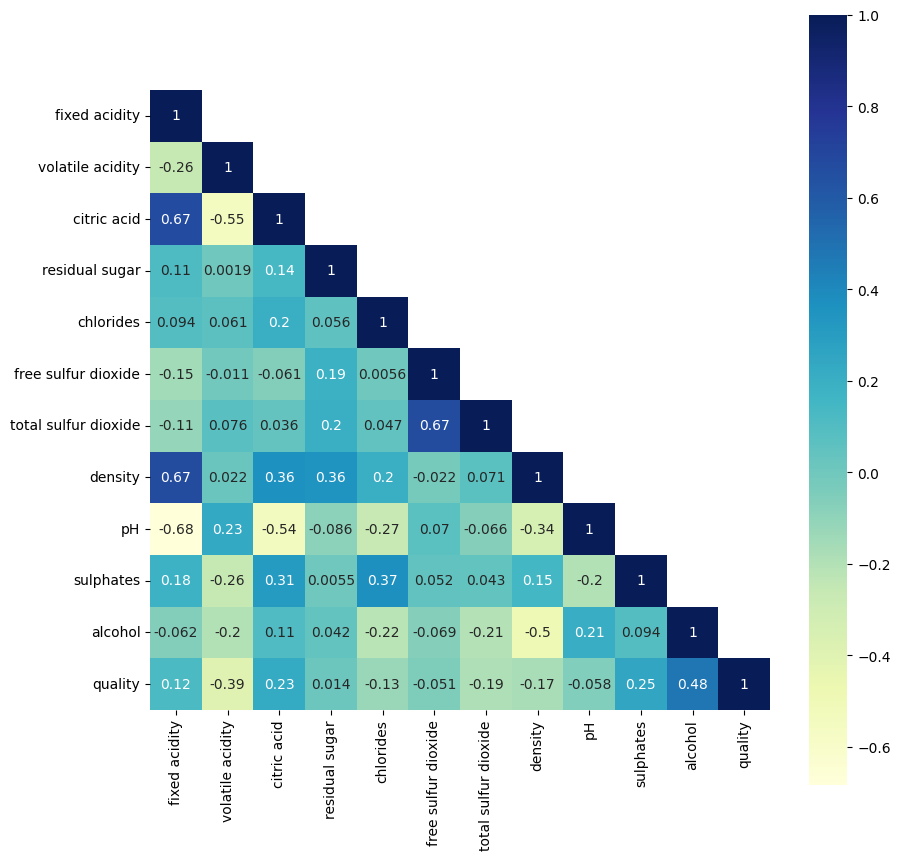

In [281]:
correlation = wineQualityRed.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

<Axes: >

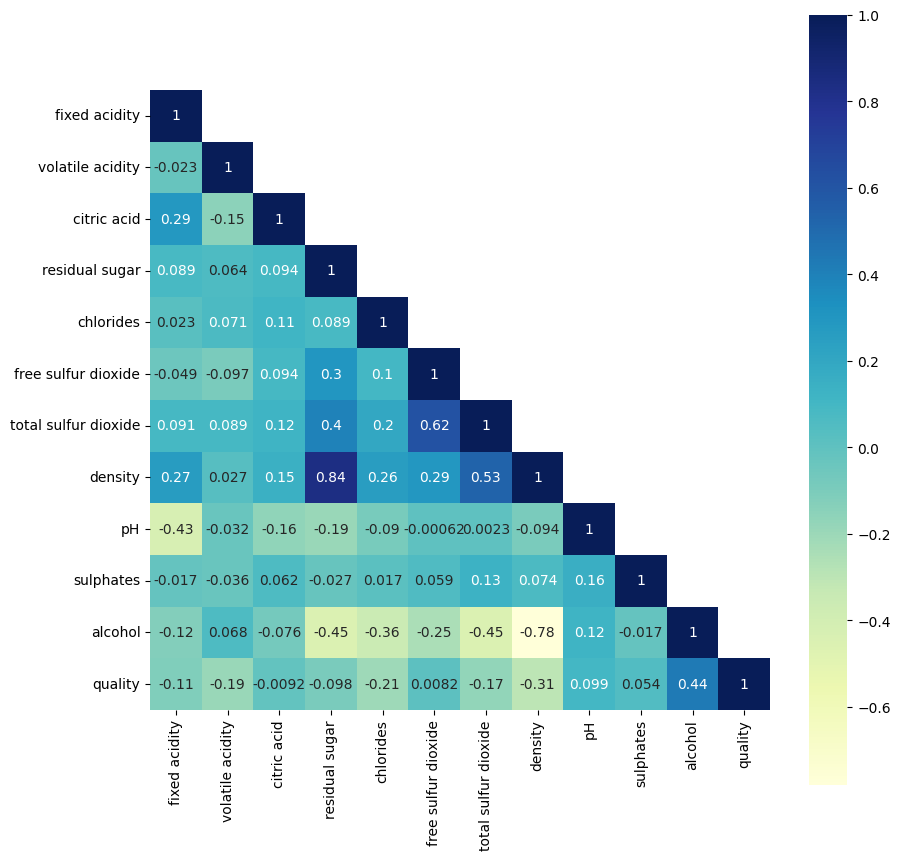

In [282]:
correlation = wineQualityWhite.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

<Axes: >

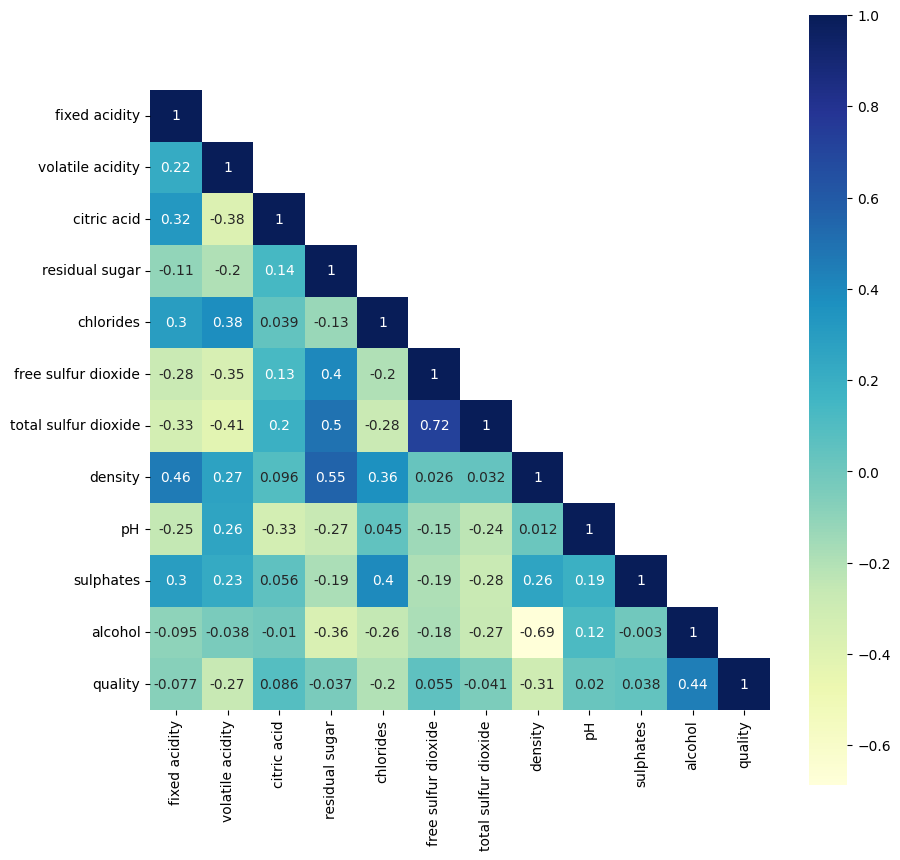

In [283]:
correlation = wineQuality.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

In [284]:
#sns.pairplot(wineQualityRed)

In [285]:
#sns.pairplot(wineQualityWhite)

In [286]:
#sns.pairplot(wineQuality)

### Elección de variables que predicen la calidad del vino

#### Variables para el vino rojo

#### Variables para el vino blanco

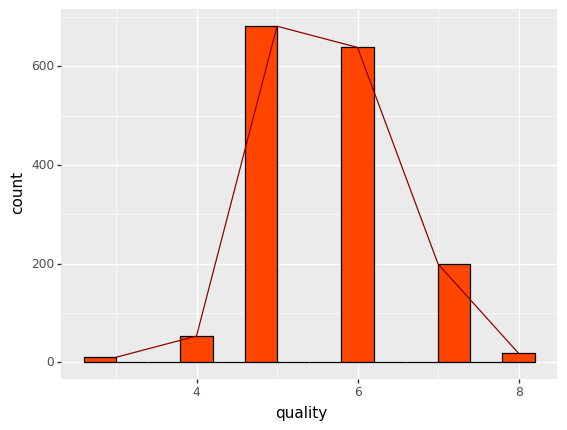

<ggplot: (8781846275103)>

In [287]:
(ggplot(wineQualityRed)+
 aes(x='quality')+
 geom_histogram(binwidth=0.4, fill='orangered', color='black')+
 geom_density(color='darkred', stat='count')
 )

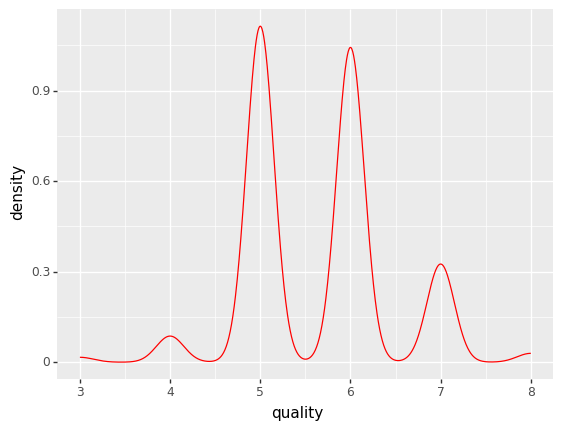

<ggplot: (8781846275247)>

In [288]:
(ggplot(wineQualityRed)+
 aes(x='quality')+
 geom_density(color='red')
 )

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 24'. Pick better value with 'binwidth'.


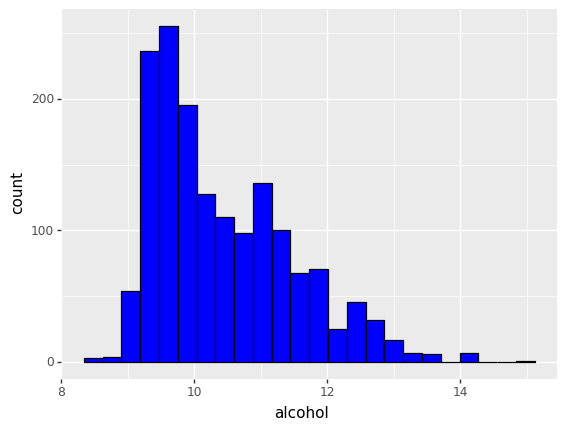

<ggplot: (8781853448844)>

In [289]:
(ggplot(wineQualityRed)+
 aes(x='alcohol', bins= 6)+
 geom_histogram( fill='blue', color='black')
 )

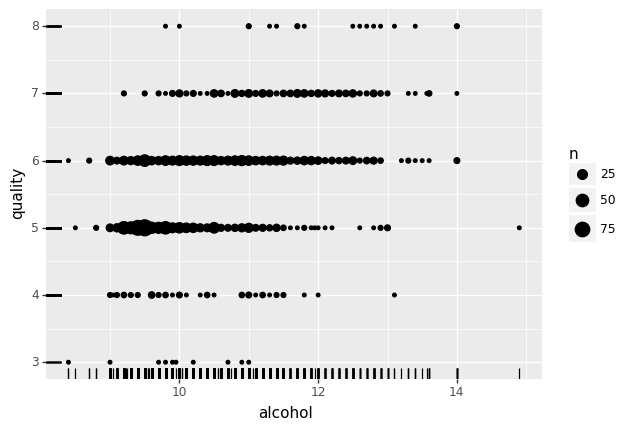

<ggplot: (8781846544739)>

In [290]:
(ggplot(wineQualityRed)+
 aes(x='alcohol', y='quality')+
 geom_count(  ) +
 geom_rug()
 )

## **Regresiones Lineales**

### Funciones de Regresión Lineal:

#### Algoritmo Batch gradient descent

In [291]:
# l = Factor de aprendizaje
def batch_gd(x, y, l = 0.0001,epocas = 2000):
  m = 0
  c = 0
  n = float(len(x)) #Cantidad de elementos

  for i in range(epocas):
    y_pred = m*x + c #Actual predicción de la variable y
    D_m = (-2/n ) * sum(x * (y - y_pred)) #Derivada parcial de m
    D_c = (-2/n ) * sum(y - y_pred) #Derivada parcial de c
    #Se actualizan las variables
    m = m - l * D_m
    c = c - l * D_c

  return m,c

#### Algoritmo Stochastic gradient descent

In [292]:
def stochastic_gd3(x,y, epochs, alpha= 0.001):
    x = np.array(x)
    y = np.array(y)
    m = len(x)
    b_0 = 1
    b_1 = 1

    for step in range(0, epochs):
        b_0_gradient = 0
        b_1_gradient = 0
        N = float(m)
        for i in range(0, m):
            b_0_gradient -= (2/N) * (y[i] - (b_0 + b_1 * x[i]))
            b_1_gradient -= (2/N) * (y[i] - (b_0 + b_1 * x[i])) * x[i]
            
        b_0 = b_0 - (alpha * b_0_gradient)
        b_1 = b_1 - (alpha * b_1_gradient)

    return b_0, b_1

In [293]:
def stochastic_gd2(x, y, epochs):
    x = np.array(x)
    y = np.array(y) 
    m = len(x)

    theta = np.random.randn(2,1)

    for i in range(epochs):
        for j in range(m):
            indiceRandom = np.random.randint(m)
            print(indiceRandom)
            xi = x[indiceRandom:indiceRandom + 1]
            yi = y[indiceRandom:indiceRandom + 1]
            print(xi)
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learningSchedule(i * m + j)
            thetha = theta - eta * gradients

    print(theta)

In [294]:
def stochastic_gd(x, y, alpha=0.001, epocas = 500):
  X = np.array(x)
  Y = np.array(y)
  l = len(x)
  m=0.005
  c=0.001

  for i in range(epocas):
    slope=0
    intercept=0
    for j in range(l):
        ri=np.random.randint(l)
        intercept=intercept+((m*X[ri:ri+1]+c)-Y[ri:ri+1])
        slope=slope+((m*X[ri:ri+1]+c)-Y[ri:ri+1])*X[ri:ri+1]
        c=(c-alpha*(intercept/l))
        m=(m-alpha*(slope/l))
  return m,c

### Regresiones lineales para el vino rojo

#### Tablas con los resultados de las 3 variables

In [295]:
resultados_prediccion_vinoRojo = pd.DataFrame()

#### Variable: Alcohol

In [296]:
x = wineQualityRed['alcohol']
y = wineQualityRed['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [297]:
theta = stochastic_gd3(x_train, y_train, 50)

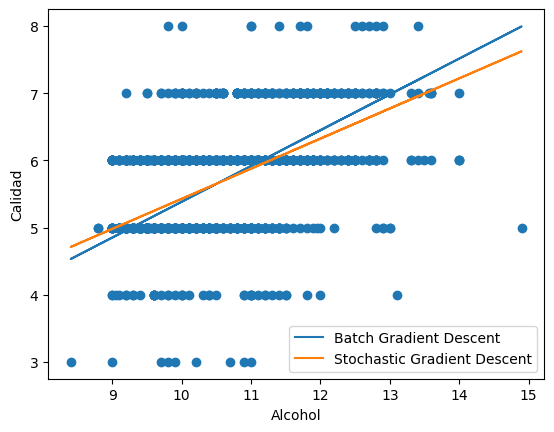

In [298]:
theta = stochastic_gd3(x_train, y_train, 50)
m,c = batch_gd(x_train, y_train)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [299]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]


error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))

resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['alcohol','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)

error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['alcohol','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-299-89c8b084849f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-299-89c8b084849f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [300]:
resultados_prediccion_vinoRojo

,variable,tipo de RL,error cuadrático,raiz del error cuadrático,error absoluto,R2,R2 ajustado
0,alcohol,batch,0.540404,0.735122,0.568264,0.173069,0.170469
1,alcohol,stochastic,0.511015,0.714853,0.568700,0.218041,0.215582



#### Variable: Sulfato

In [301]:
x = wineQualityRed['sulphates']
y = wineQualityRed['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

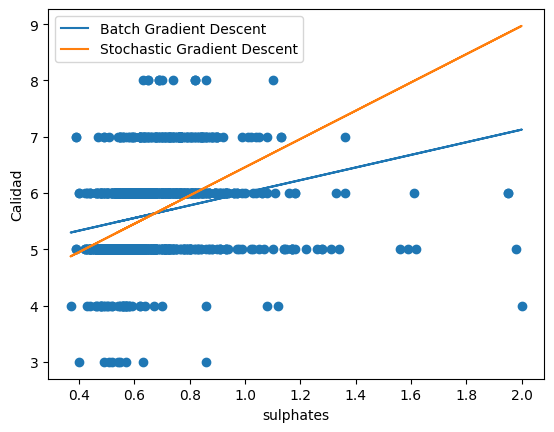

In [302]:
theta = stochastic_gd3(x_train, y_train, 50, 0.1)
m,c = batch_gd(x_train, y_train, 0.1)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('sulphates')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [303]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]

error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['sulphates','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)


error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['sulphates','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-303-bf187b17898b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-303-bf187b17898b>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [304]:
resultados_prediccion_vinoRojo

,variable,tipo de RL,error cuadrático,raiz del error cuadrático,error absoluto,R2,R2 ajustado
0,alcohol,batch,0.540404,0.735122,0.568264,0.173069,0.170469
1,alcohol,stochastic,0.511015,0.714853,0.568700,0.218041,0.215582
2,sulphates,batch,0.605480,0.778126,0.650973,0.073489,0.070576
3,sulphates,stochastic,0.621029,0.788054,0.633024,0.049697,0.046709


#### Variable: Ácido cítrico

In [305]:
x = wineQualityRed['citric acid']
y = wineQualityRed['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

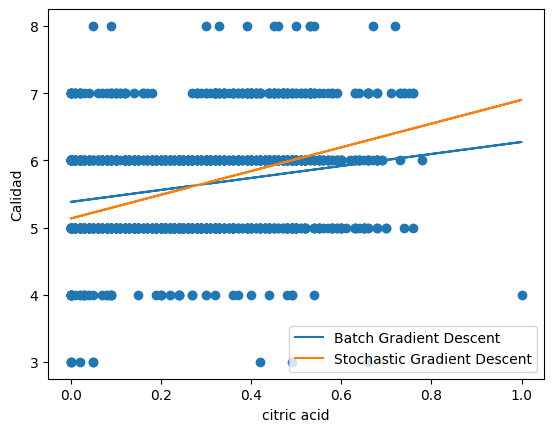

In [306]:
theta = stochastic_gd3(x_train, y_train, 50, 0.1)
m,c = batch_gd(x_train, y_train, 0.1)

fig, ax = plt.subplots()
plt.plot(x_train,(x_train*m + c))
plt.plot(x_train,(x_train*theta[1] + theta[0]))
ax.scatter(x_train, y_train)
plt.xlabel('citric acid')
plt.ylabel('Calidad')
plt.legend(['Batch Gradient Descent', 'Stochastic Gradient Descent'])
plt.show()

In [307]:
y_pred_batch = x_test*m + c
y_pred_stoch = x_test*theta[1] + theta[0]

error_cuadrado = mean_squared_error(y_test,y_pred_batch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_batch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_batch)
r2 = r2_score(y_test,y_pred_batch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['citric acid','batch',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2, r2_ajust], 
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']), 
    ignore_index=True)


error_cuadrado = mean_squared_error(y_test,y_pred_stoch)
raiz_error_cuadrado = np.sqrt(mean_squared_error(y_test,y_pred_stoch))
error_absoluto_medio = mean_absolute_error(y_test,y_pred_stoch)
r2 = r2_score(y_test,y_pred_stoch)
r2_ajust = 1 - (1 - r2)*((len(y_test) - 1) /(len(y_test) - 2))


resultados_prediccion_vinoRojo = resultados_prediccion_vinoRojo.append(pd.Series(
    ['citric acid','stochastic',error_cuadrado, raiz_error_cuadrado, error_absoluto_medio, r2,r2_ajust],
    index=['variable','tipo de RL','error cuadrático','raiz del error cuadrático','error absoluto','R2','R2 ajustado']),  
    ignore_index=True)

<ipython-input-307-19132d83b650>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-307-19132d83b650>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [308]:
resultados_prediccion_vinoRojo

,variable,tipo de RL,error cuadrático,raiz del error cuadrático,error absoluto,R2,R2 ajustado
0,alcohol,batch,0.540404,0.735122,0.568264,0.173069,0.170469
1,alcohol,stochastic,0.511015,0.714853,0.568700,0.218041,0.215582
2,sulphates,batch,0.605480,0.778126,0.650973,0.073489,0.070576
3,sulphates,stochastic,0.621029,0.788054,0.633024,0.049697,0.046709
4,citric acid,batch,0.612295,0.782493,0.653738,0.063062,0.060115
5,citric acid,stochastic,0.626705,0.791647,0.641308,0.041011,0.037995


### Regresiones lineales para el vino blanco

### Métricas y resultados

## **Conclusiones**